In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython
import sklearn
import mglearn

# Linear regression or OLS

## First dataset

In [24]:
from sklearn.model_selection import train_test_split
# If want to call all datasets: x, y = mglearn.datasets.make_forge()

In [26]:
from sklearn.linear_model import LinearRegression
x, y = mglearn.datasets.make_wave(n_samples = 65)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 123)

In [43]:
x_train[1:3]

array([[-0.80182894],
       [ 2.7937922 ]])

In [27]:
# Model:

lr = LinearRegression()

In [28]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
lr.coef_

array([0.43540899])

In [30]:
lr.intercept_

0.08765281465813521

In [31]:
print("training set score: %f" % lr.score(x_train, y_train))

training set score: 0.621281


In [32]:
print("test set score: %f" % lr.score(x_test, y_test))

test set score: 0.581093


In [39]:
(0.621281 + 0.581093)/2

0.6011869999999999

An $R^2$ of around 0.6 is not very good, but we can see that the score on training
and test set are very close together. This means we are likely underfitting, not overfitting. This is because the data has just only one dimention.

## Second dataset - higher dimentional 

In [62]:
x, y = mglearn.datasets.load_extended_boston()

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [76]:
lr = LinearRegression().fit(x_train, y_train)

In [77]:
print("training set score: %f" % lr.score(x_train, y_train))

training set score: 0.952353


In [78]:
print("test set score: %f" % lr.score(x_test, y_test))

test set score: 0.605775


That's pretty good now!

# Ridge regression

In [79]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)

In [80]:
ridge.score(x_train, y_train)

0.8860578560395835

In [81]:
ridge.score(x_test, y_test)

0.7527139600306949

As you can see, the training set score of Ridge is lower than for LinearRegression, while the test set score is higher.

The Ridge model makes a trade-off between the simplicity of the model (near zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter. Above, we used the default parameter alpha=1.0.

Increasing alpha forces coefficients to move more towards zero, which decreases training set performance,
but might help generalization.

In [82]:
# Increase alpha:

ridge10 = Ridge(alpha = 10).fit(x_train, y_train)

In [83]:
ridge10.score(x_train, y_train)

0.7883461511233251

In [84]:
ridge10.score(x_test, y_test)

0.6358967327447731

In [90]:
# Decrease alpha:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print("training set score: %f" % ridge01.score(x_train, y_train))
print("test set score: %f" % ridge01.score(x_test, y_test))

training set score: 0.928578
test set score: 0.771793


# Linear models for multiclass classification

## Simple three-class classification dataset

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [103]:

from sklearn.datasets import make_blobs # new dataset

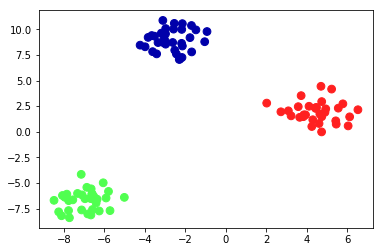

In [104]:
x,y = make_blobs(random_state = 42)
plt.scatter(x[:, 0], x[:, 1], c = y, s = 60, cmap = mglearn.cm3)

In [97]:
make_blobs()

(array([[ 7.98000928,  1.0261327 ],
        [ 0.4685459 , -4.72364443],
        [ 5.8981638 ,  0.1016913 ],
        [-5.27268847,  6.42000606],
        [-1.25905469, -4.12869715],
        [ 0.46284527, -4.67067851],
        [ 6.46567888, -0.08344605],
        [ 6.56769026,  0.75385124],
        [ 6.48153641, -0.17585455],
        [-0.28794536, -4.21028383],
        [ 7.9817049 ,  0.05951067],
        [-0.13621652, -2.81952311],
        [ 8.18240688,  1.31118677],
        [ 8.84384681, -0.47417569],
        [-5.65383534,  4.4886497 ],
        [ 7.72503557, -0.01534575],
        [-1.22326025, -2.62573184],
        [ 9.40507419,  1.30737387],
        [-6.19883812,  4.63836175],
        [-5.29489172,  5.98521747],
        [-0.68288144, -0.3441518 ],
        [-1.83701513, -4.2875632 ],
        [-2.98093654, -3.93292513],
        [-6.53526789,  6.68559013],
        [ 8.14208112, -0.84378669],
        [-1.76136064, -4.37363707],
        [-0.37030193, -2.84907779],
        [ 8.18203085, -0.662

In [105]:
# Train a LinearSVC classifier on the dataset:

linear_svm = LinearSVC().fit(x,y)
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492211  0.23140057]
 [ 0.47621695 -0.06936581]
 [-0.18914192 -0.20400599]]
[-1.07745601  0.13140434 -0.08605013]
